# Model Training
The following notebook trains two deep learning models:
1. **SheetClassifier**: A model for identifying images of metal sheets with defects, classifying them by their defect.
2. **SheetHighlighter**: A model which takes images of metal sheets with defects and highlights the defects in the image.

In [1]:
# Imports
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from trainer import Trainer
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Classifier with Resnet

In [13]:
from models.ResnetClassifier import ResnetClassifier
from datasets.ResnetSet import ResnetSet

class_set = ResnetSet('../../../ml_data/metal_sheet_data/training_set')
trainer = Trainer(30, 0.0001, ResnetClassifier, class_set, 100, criterion=nn.CrossEntropyLoss, show=True)
trainer.run_experiment()

/home/sms/Documents/hobbies/skills/programming/databases/elasticsearch/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sms/Documents/hobbies/skills/programming/databases/elasticsearch/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Train Loss: 1.21, Accuracy: 0.34
Epoch [11/30], Train Loss: 0.69, Accuracy: 0.72
Epoch [21/30], Train Loss: 0.60, Accuracy: 0.76
Experiment Complete


ResnetClassifier(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [15]:
trainer.evaluate_model()

[Evaluation over 10 Batches], Test Loss: 0.62, Accuracy: 0.76


ResnetClassifier(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

# Training the Classifier

In [29]:
from models.SheetClassifier import SheetClassifier
from datasets.ClassificationSet import ClassificationSet

class_set = ClassificationSet('../../../ml_data/metal_sheet_data/training_set')
trainer = Trainer(30, 0.0001, SheetClassifier, class_set, 100, criterion=nn.CrossEntropyLoss, show=True)
sc = SheetClassifier()

### Pre-Training Predictions

In [30]:
trainer.evaluate_model(sc)

[Evaluation over 10 Batches], Test Loss: 9.04, Accuracy: 0.32


SheetClassifier(
  (model): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin1): Linear(in_features=16384, out_features=3, bias=True)
)

In [31]:
sc = trainer.run_experiment(sc)

Epoch [1/30], Train Loss: 0.81, Accuracy: 0.60
Epoch [11/30], Train Loss: 0.14, Accuracy: 0.98
Epoch [15/30], Train Loss: 0.10, Accuracy: 0.99
Experiment Complete


In [32]:
trainer.evaluate_model(sc)
torch.save(sc.state_dict(),'./classifier_model.pkl')

[Evaluation over 10 Batches], Test Loss: 0.57, Accuracy: 0.78


# Training the Highlighter

In [24]:
from models.SheetHighlighter import SheetHighlighter
from datasets.HighlighterSet import HighlighterSet

highlight_set = HighlighterSet('./sheet_data/training_set')
trainer = Trainer(5, 0.0001, SheetHighlighter, highlight_set, 10, criterion=nn.BCELoss, show=True)
sh = SheetHighlighter()

In [20]:
trainer.evaluate_model(sh)

[Evaluation over 20 Batches], Test Loss: 0.97, Accuracy: 0.55


SheetHighlighter(
  (model): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(8, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Sigmoid()
  )
)

In [21]:
sh = trainer.run_experiment()

Epoch [1/5], Train Loss: 0.17, Accuracy: 0.91
Experiment Complete


In [22]:
trainer.evaluate_model(sh)
torch.save(sh.state_dict(),'./highlighter_model.pkl')

[Evaluation over 20 Batches], Test Loss: 0.06, Accuracy: 0.98


### Highlighter Demonstration

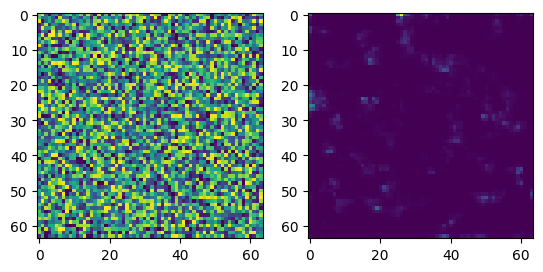

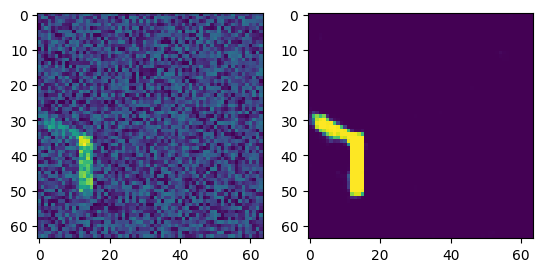

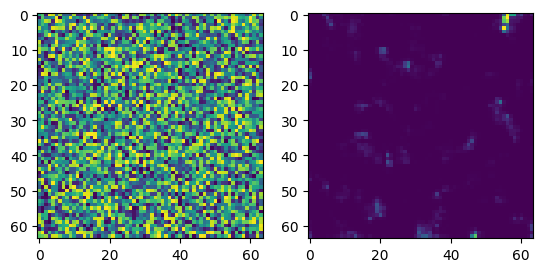

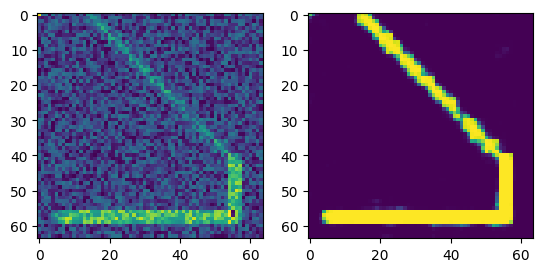

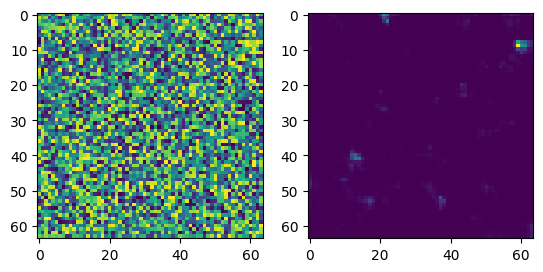

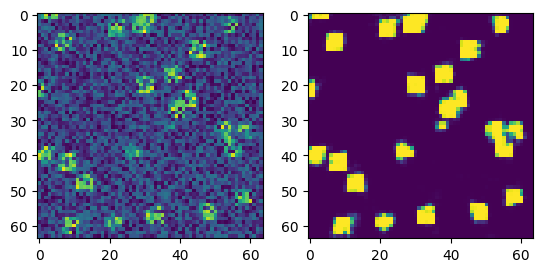

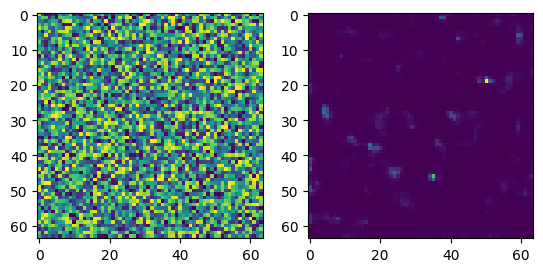

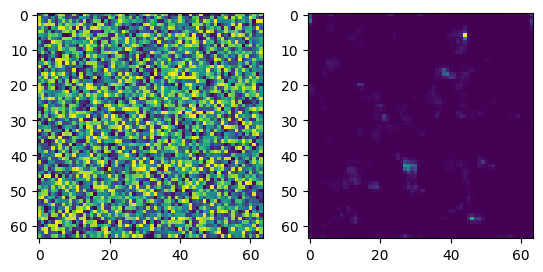

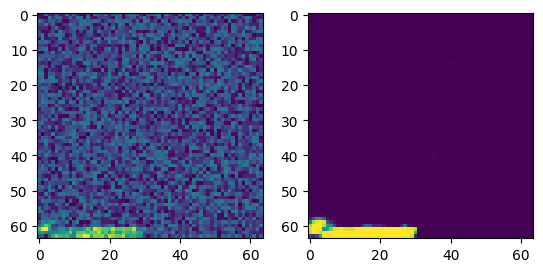

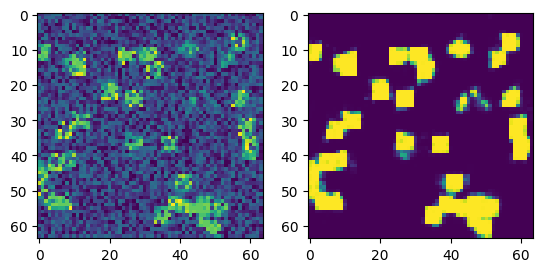

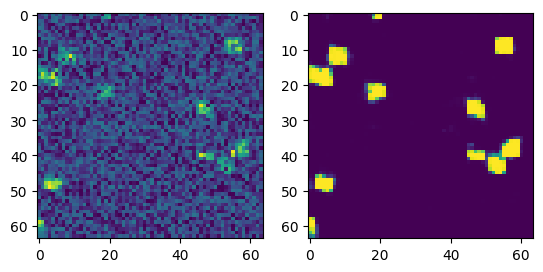

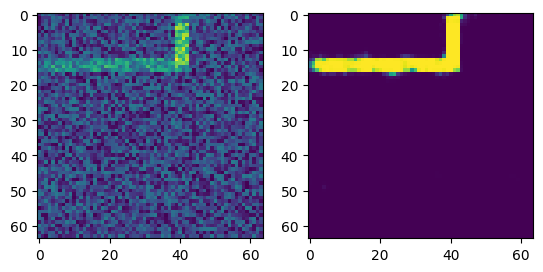

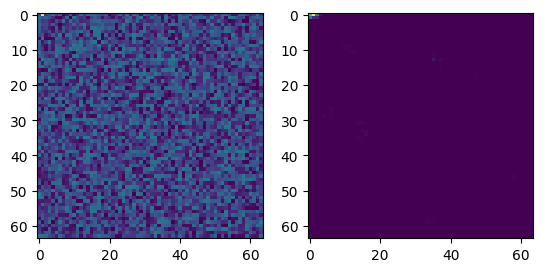

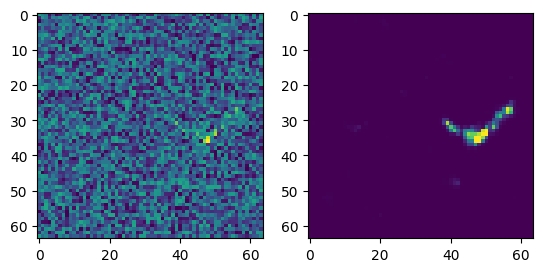

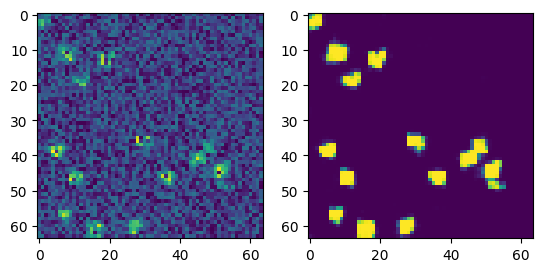

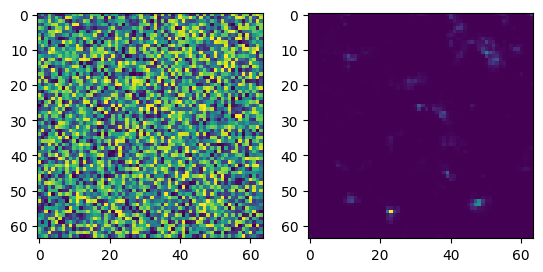

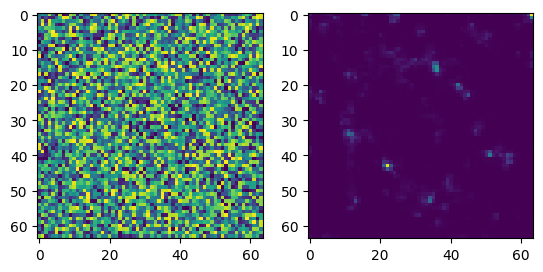

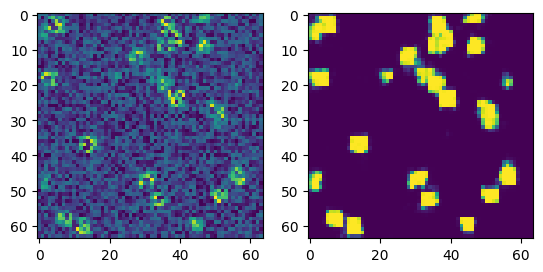

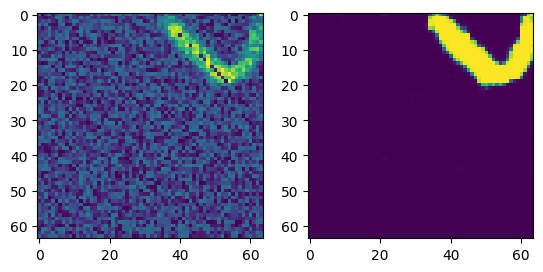

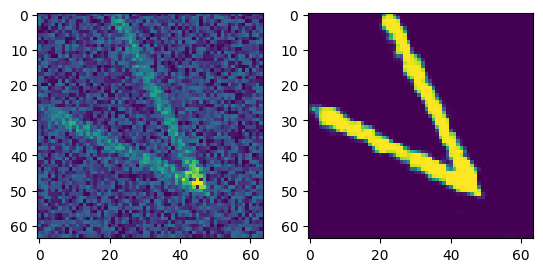

In [67]:
for i, (x,y) in enumerate(trainer.testing_loader):
    if i > 1: break
    yhat = trainer.model(x)
    for j in range(len(x)):
        sample, prediction = x[j], yhat[j].detach().numpy()[0]
        plt.subplot(1,2,1)
        plt.imshow(sample[0])
        plt.subplot(1,2,2)
        plt.imshow(prediction)
        plt.show()